Дисциплина «Искусственный интеллект»

Рабочая тетрадь № 4

# Линейные регрессионные модели

1.1. Теоретический материал – Линейные регрессионные модели

**Линейная регрессия**

**Линейная регрессия** (Linear regression) – модель зависимости переменной
x от одной или нескольких других переменных (факторов, регрессоров,
независимых переменных) с линейной функцией зависимости. Линейная
регрессия относится к задаче определения «линии наилучшего соответствия»
через набор точек данных и стала простым предшественником нелинейных
методов, которые используют для обучения нейронных сетей.

**Цель линейной регрессии** — поиск линии, которая наилучшим образом
соответствует этим точкам. Напомним, что общее уравнение для прямой есть
𝑓 (𝑥) = 𝑏 + 𝑚 ⋅ 𝑥 +, где 𝑚 – наклон линии, а 𝑏 – его сдвиг.

**Функция потерь — метод наименьших квадратов**

**Функция потерь** – это мера количества ошибок, которые наша линейная
регрессия делает на наборе данных. Хотя есть разные функции потерь, все они
вычисляют расстояние между предсказанным значением 𝑦(х) и его
фактическим значением.

Одна очень распространенная функция потерь называется средней
квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все
значения ошибок, считаем их квадраты длин и усредняем.
Задача экраполяции

Допустим у нас есть много экспериментальных точек. Необходимо через
них провести кривую, которая как можно ближе проходила к этим точкам. При
этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми
распостраненными выступают:

numpy - numpy.linalg.lstsq

scipy - scipy.linalg (содержит все функции из numpy.linalg плюс часть
новых функций, которых нет в numpy.linalg).

## Примеры

1.1.1 Пример

**Задача:**

Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.

Решение:

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]
0.9999999999999999 -0.9499999999999997


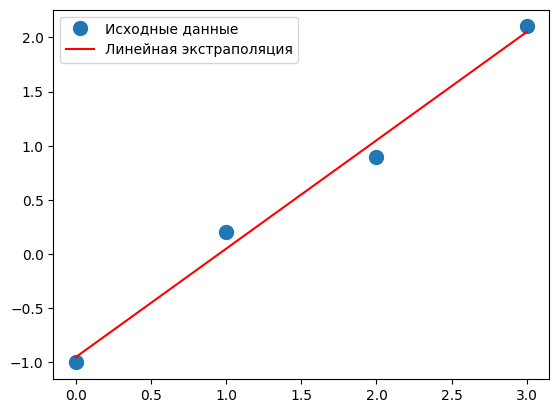

In [4]:
import numpy as np
x=np.array([0,1,2,3])
y=np.array([-1,0.2,0.9,2.1])
#Перепишем лин. уравнение как y=Ap, где A=[[x1]] и p=[[m],[c]]
#Построим А по х
A=np.vstack([x,np.ones(len(x))]).T
print(A)

#Используем метод lstsq для решения его относительно вектора p
m, c = np.linalg.lstsq(A,y,rcond=None)[0]
print(m,c)

#Построим график полученной прямой и укажем точки
import matplotlib.pyplot as plt
plt.plot(x,y,'o',label='Исходные данные',markersize=10)
plt.plot(x,m*x+c,'r',label='Линейная экстраполяция')
plt.legend()
plt.show()

1.1.2 Пример  
**Задание:**

Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу
наименьших квадратов. Данные мтогут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла.

Решение:

[-4.99899811 -4.1918676  -2.9103527  -1.56379059 -0.82904113  0.16572597
  0.83636318  1.74578863  2.88855596  3.86551615  5.41974872]
[24.6087284  16.05076514  8.98729909  3.74757498  1.34151389  0.43758005
  0.7636728   4.42340441  8.63843295 15.53476469 25.1983649 ]


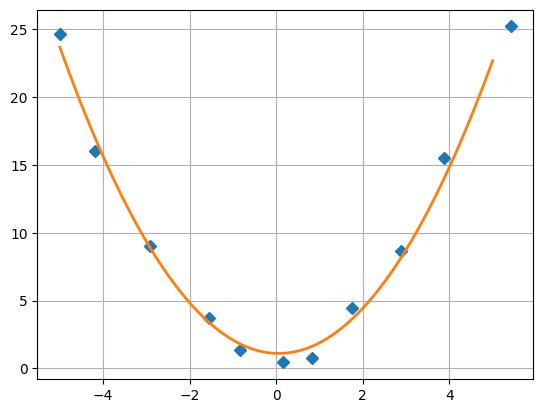

In [4]:
from numpy import*
from numpy.random import*
import numpy as np
import matplotlib.pyplot as plt

#Генерируем случайные x и y
delta = 1.0
x=linspace(-5,5,11)
y=x**2+delta*(rand(11)-0.5)
x+=delta*(rand(11)-0.5)

#Записываем данные в файл
x.tofile('x_data.txt','\n')
y.tofile('y_data.txt','\n')

#Читаем данные из файлов
x=fromfile('x_data.txt',float,sep='\n')
y=fromfile('y_data.txt',float,sep='\n')

print(x)
print(y)

#Нахождение коэффициентов функции вида y=ax2+bx+c с методом наименьших квадратов
#Задаем вектор m = [x**2, x, E]
m=vstack((x**2,x,ones(11))).T

#Находим коэффициенты при состовляющих вектора m
s=np.linalg.lstsq(m, y, rcond = None)[0]

#На отрезке [-5, 5]
x_prec=linspace(-5, 5, 101)

# Рисуем точки
plt.plot(x, y, 'D')

#Рисуем кривую вида параболы, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0]*x_prec**2+s[1]*x_prec+s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')

1.1.3 Пример  
**Задание:**

По данным предыдущего примера постройте эстраполяционного полинома
третьего порядка

Решение:

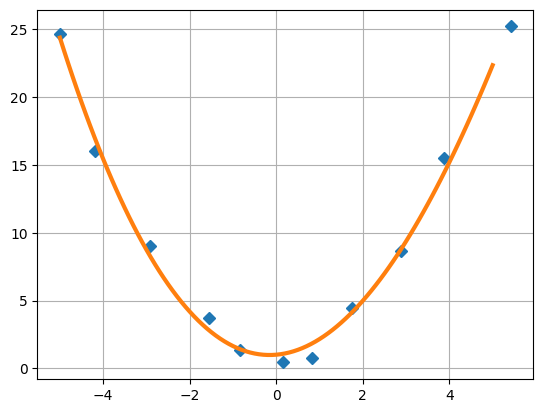

In [5]:
#Нахождение коэф. функции вида гиперболы методам наименьших квадратов
#Задаем вектор m=[x**3, x, E]
m = vstack((x**3, x**2, x, ones(11))).T
#Находим коэф. при состовляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

#На отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)
#Рисуем точки
plt.plot(x, y, 'D')
#Рисуем кривую виду гиперболы, подставляя из решения коэф. s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0]*x_prec**3+s[1]*x_prec**2+s[2]*x_prec +s[3], '-', lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')

1.1.4 Пример  
**Задание:**

Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривую вида 𝑓(𝑥, 𝑏) = $b_{0}+b_{1}*exp(-b2x^2)$

Решение:

0.00018818895862039256
0.09871360375704173


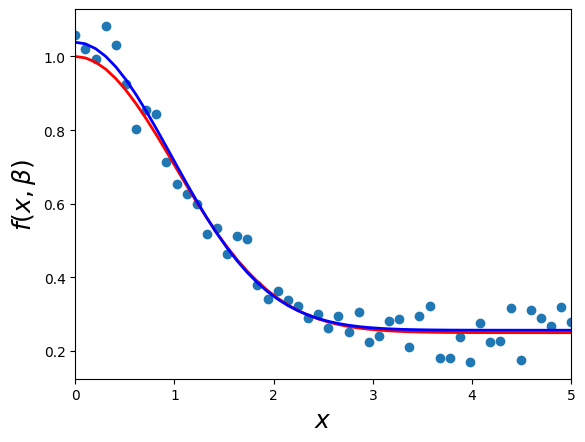

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[1.05739736 1.01972627 0.99395489 1.08292216 1.0311078  0.92587112
 0.80329152 0.85522414 0.84508343 0.71399092 0.65371744 0.62647263
 0.59925137 0.51806281 0.53425378 0.46361792 0.51131705 0.50553371
 0.37928601 0.34152252 0.36290112 0.33847908 0.32263451 0.28978392
 0.30073011 0.26247136 0.29436848 0.25079478 0.3069093  0.22493325
 0.24041291 0.28054719 0.2868283  0.21025633 0.29564309 0.3228879
 0.18073584 0.18146773 0.23701774 0.170

In [17]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

#Добавим шума в данные, сделанные по ф-ции f(x,b) с коэф. b=(0.25, 0.75, 0.5)
beta=(0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)
#Зададим массив точек xi
xdata = np.linspace(0, 5, 50)
#Создаем теоритически правильные значения точек yi(без шума)
y = f(xdata,*beta)
#Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
#Используем ф-цию для получения решения в виде коэф. ф-ции f(x) для указанных xdata и ydata
from scipy.optimize import curve_fit
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt
#Вычислим линейное отклонение
lin_dev=sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals=ydata-f(xdata,*beta_opt)
fres=sum(residuals**2)
print(fres)

fig,ax=plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()
print(xdata)
print(ydata)

1.1.5 Пример  
**Задание:**

Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:

1) f(x,b)=$b_{0}+b_{1}x$;

2) f(x,b)=$b_{0}+b_{1}x+b_{2}x^2$;

3) f(x,b)=$b_{0}+b_{1}ln(x)$;

4) f(x,b)=$b_{0}x^{b_{1}}$

Решение:

[0.27934424 0.74914616]
1.046094619718748e-05
0.00919841820291618


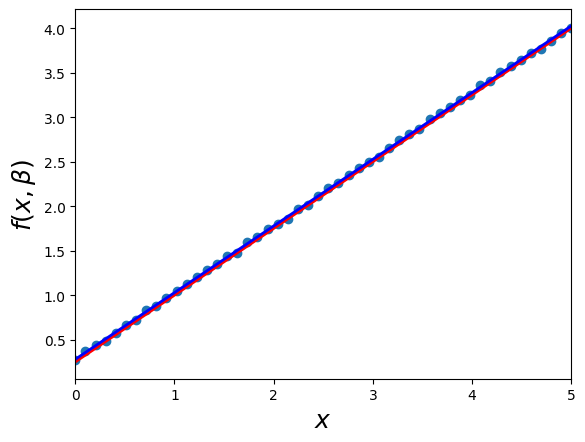

[0.25112326 0.74256301 0.5024103 ]
0.00012614838876324395
0.1051945498638261


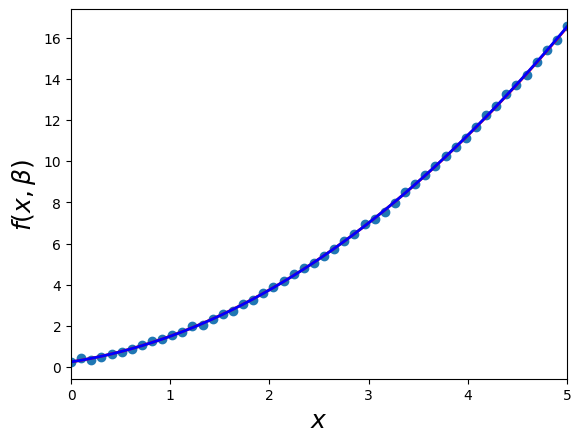

[1.01096042 1.99660996]
5.544663099685016e-05
0.1282170783490964


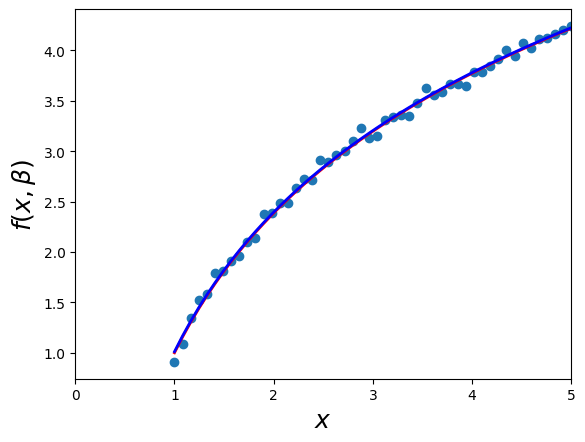

[0.99964699 1.99947156]
3.7763889937687054e-06
0.08983171401768822


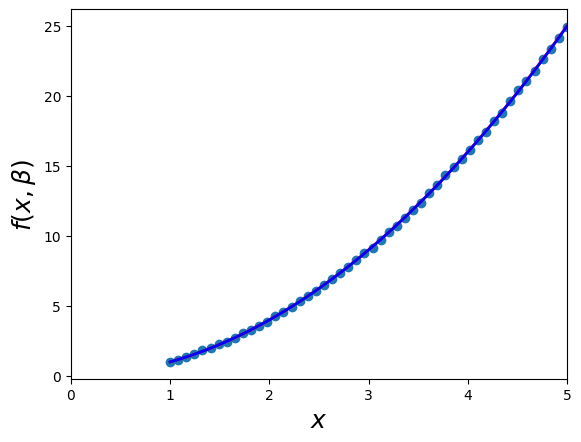

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from random import randint, random
#1
#Добавим шума в данные, сделанные по ф-ции f(x,b) с коэф. b=(0.25, 0.75)
beta = (0.25,0.75)
def f(x, b0, b1):
    return b0 + b1 * x
#Зададим массив точек xi
xdata = np.linspace(0, 5, 50)
#Создаем теоритически правильные значения точек yi(без шума)
y = f(xdata, *beta)
#Зашумляем эти данные
ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#2
#Добавим шума в данные, сделанные по ф-ции f(x,b) с коэф. b=(0.25,0.75,0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x
#Зададим массив точек xi
xdata = np.linspace(0, 5, 50)
#Создаем теоритически правильные значения точек yi(без шума)
y = f(xdata, *beta)
#Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()\

#3
#Добавим шума в данные, сделанные по ф-ции f(x,b) с коэф. b=(1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
#Зададим массив точек xi
xdata = np.linspace(1, 5, 50)
#Создаем теоритически правильные значения точек yi(без шума)
y = f(xdata, *beta)
#Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#4
#Добавим шума в данные, сделанные по ф-ции f(x,b) с коэф. b=(1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 * x ** b1
#Зададим массив точек xi
xdata = np.linspace(1, 5, 50)
#Создаем теоритически правильные значения точек yi(без шума)
y = f(xdata, *beta)
#Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

## Задание

1.3.1 Задание №1

Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.

Решение:

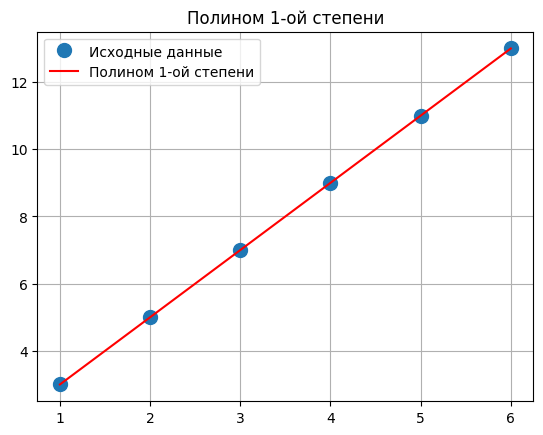

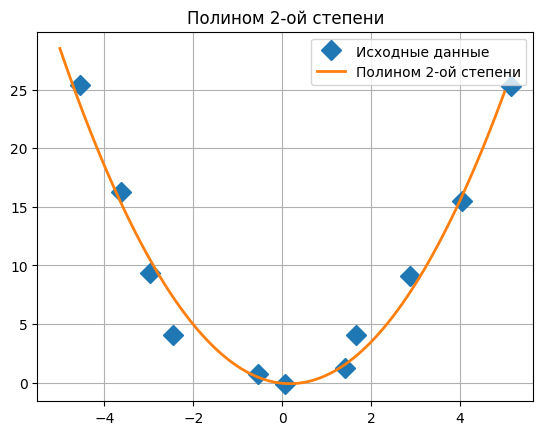

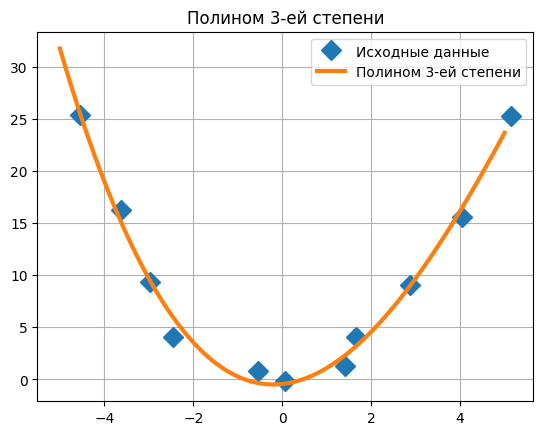

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Представим собственные данные
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([3, 5, 7, 9, 11, 13])
#Построим А по х
A = np.vstack([x, np.ones(len(x))]).T
#Используем метод lstsq для решения его относительно вектора p
m,c = np.linalg.lstsq(A,y,rcond = None)[0]

#Построим график полученной прямой и укажем точки
plt.figure(1)
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Полином 1-ой степени')
plt.title("Полином 1-ой степени")
plt.legend()
plt.grid()

#Генерируем случайные x и y
delta = 1.0
x = np.linspace(-5, 5, 11)
y = x**2 + delta * (np.random.rand(11) - 0.5)
x+= delta * (np.random.rand(11) - 0.5)
#Нахождение коэффициентов функции вида y=ax2+bx+c с методом наименьших квадратов
#Задаем вектор m = [x**2, x, E]
m = np.vstack((x**2, x, np.ones(11))).T
#Находим коэффициенты при состовляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]
#На отрезке [-5, 5]
x_prec = np.linspace(-5, 5, 101)

plt.figure(2)
# Рисуем точки
plt.plot(x,y,'D', label='Исходные данные', markersize=10)
#Рисуем кривую вида параболы, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0]*x_prec**2 + s[1] * x_prec + s[2], '-', lw=2, label='Полином 2-ой степени')
plt.title("Полином 2-ой степени")
plt.legend()
plt.grid()

plt.figure(3)
#Нахождение коэф. функции вида гиперболы методам наименьших квадратов
#Задаем вектор m=[x**3, x, E]
m = np.vstack((x**3, x**2, x, np.ones(11))).T
#Находим коэф. при состовляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]
#Рисуем точки
plt.plot(x,y,'D', label='Исходные данные', markersize=10)
#Рисуем кривую виду гиперболы, подставляя из решения коэф. s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0]*x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec +s[3], '-', lw=3, label='Полином 3-ей степени')
plt.title("Полином 3-ей степени")
plt.legend()
plt.grid()

plt.show()

1.3.2 Задание

Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.

Решение:

6.522184962042012e-05
0.23408053321380018


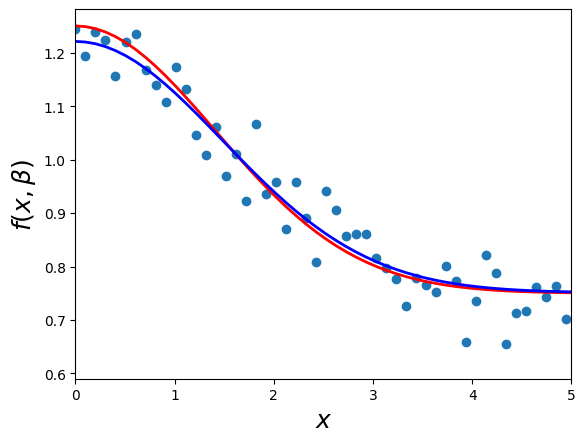

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

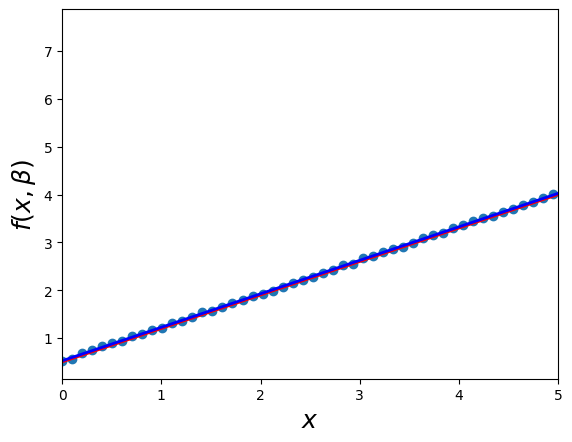

[0.75754917 0.50324476 0.24960436]
0.00015048632394432598
0.2657619645312865


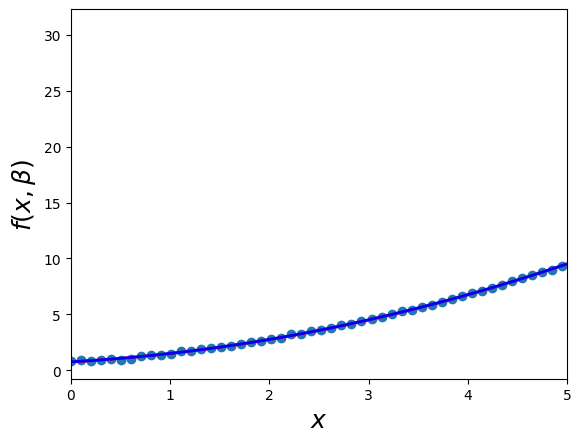

[2.00650491 0.98854463]
9.628945338504855e-05
0.27653688485704087


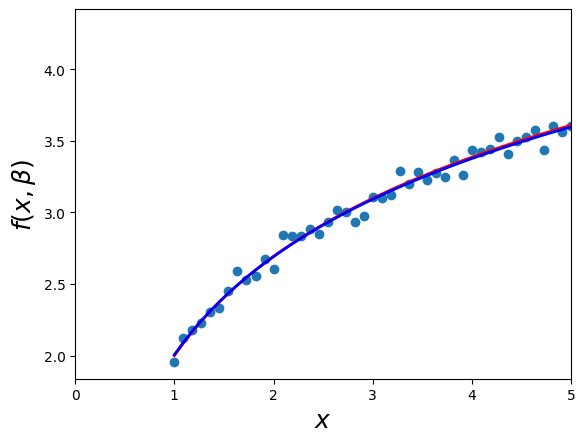

[1.00027444 2.99987556]
1.8610854909139124e-08
0.23742281370529067


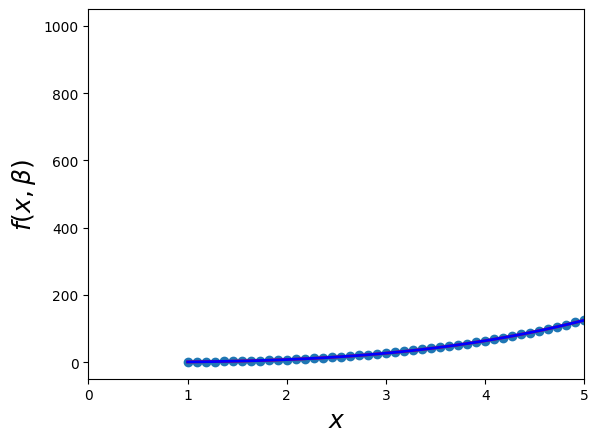

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, random
import scipy as sp

#Добавим шума в данные, сделанные по ф-ции f(x,b) с коэф. b=(0.75,0.5,0.25)
beta = (0.75, 0.5, 0.25)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2*x**2)
#Зададим массив точек xi
xdata=np.linspace(0, 10, 100)
#Создаем теоритически правильные значения точек yi(без шума)
y=f(xdata,*beta)
#Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
from scipy.optimize import curve_fit
beta_opt,beta_cov=sp.optimize.curve_fit(f,xdata,ydata)
beta_opt
#Вычислим линейное отклонение
lin_dev=sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals=ydata-f(xdata, *beta_opt)
fres=sum(residuals**2)
print(fres)

fig,ax=plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata,f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$",fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()
print(xdata)
print(ydata)

#1
#Добавим шума в данные, сделанные по ф-ции f(x,b) с коэф. b=(0.5,0.7)
beta = (0.5,0.7)
def f(x, b0, b1):
    return b0 + b1 * x
#Зададим массив точек xi
xdata=np.linspace(0, 10, 100)
#Создаем теоритически правильные значения точек yi(без шума)
y = f(xdata, *beta)
#Зашумляем эти данные
ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()

#2
#Добавим шума в данные, сделанные по ф-ции f(x,b) с коэф. b=(0.75,0.5,0.25)
beta = (0.75,0.5,0.25)
def f(x, b0, b1,b2):
    return b0 + b1 * x + b2 * x * x
#Зададим массив точек xi
xdata=np.linspace(0, 10, 100)
#Создаем теоритически правильные значения точек yi(без шума)
y = f(xdata, *beta)
#Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()\

#3
#Добавим шума в данные, сделанные по ф-ции f(x,b) с коэф. b=(2, 1)
beta = (2, 1)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
#Зададим массив точек xi
xdata = np.linspace(1, 10, 100)
#Создаем теоритически правильные значения точек yi(без шума)
y = f(xdata, *beta)
#Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()

#3
#Добавим шума в данные, сделанные по ф-ции f(x,b) с коэф. b=(1, 3)
beta = (1, 3)
def f(x, b0, b1):
    return b0 * x ** b1
#Зададим массив точек xi
xdata = np.linspace(1, 10, 100)
#Создаем теоритически правильные значения точек yi(без шума)
y = f(xdata, *beta)
#Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()

# Задачи регрессии

1.2. Теоретический материал – Задачи регрессии
класса

**Линейная регрессия** - это широко используемый метод статистического
анализа, который использует регрессионный анализ в математической
статистике для определения количественной взаимосвязи между двумя или
более переменными. Если регрессионный анализ включает две или более
независимых переменных, а связь между зависимой и независимой
переменными является линейной, тогда имееи дело с множественной линейной
регрессией.

В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного
обучения можно использовать для реализации функций регрессии. Мы начнем
с простой линейной регрессии с участием двух переменных, а затем перейдем к
линейной регрессии с участием нескольких переменных.

## Примеры

1.2.1 Пример

**Задача:**

Построим простую линейную регрессию в Python с использованием
библиотеки scikit-learn

Решение:

   Учебное время  Оценка
0           0.50      10
1           0.75      22
2           1.00      13
3           1.25      43
4           1.50      20
(20, 2)
       Учебное время     Оценка
count      20.000000  20.000000
mean        2.887500  53.150000
std         1.501041  26.059194
min         0.500000  10.000000
25%         1.687500  30.250000
50%         2.875000  58.500000
75%         4.062500  73.500000
max         5.500000  93.000000


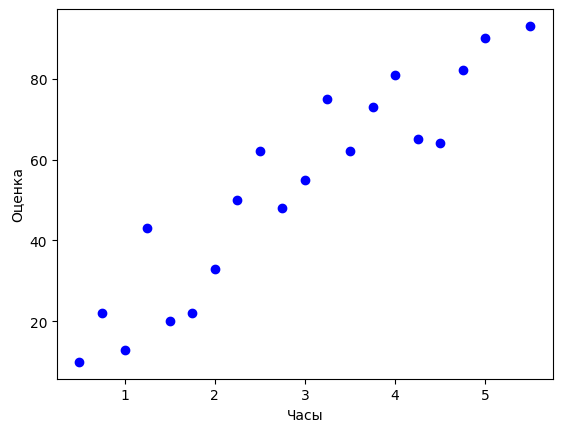

In [47]:
#Используем pandas и numpy для обработки данных
#matplotlib для визуализации и sklearn для обучения набора данных и импорта моделей
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#Создадим набор данных для описания взаимосвязи между временем обучения студентов и успеваемостью
my_dict={'Учебное время': [0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00,5.50],
         'Оценка':[10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,65,64,82,90,93]}

dataset=pd.DataFrame(my_dict)
print(dataset.head())
#Исследуем набор данных
print(dataset.shape)
print(dataset.describe())
#Нарисуем точечную диаграму
plt.scatter(dataset['Учебное время'],dataset['Оценка'], color='b',label="данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

После того как мы получили представление о данных, разделим информацию
на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки
– это зависимые переменные, значения которых должны быть предсказаны. В
нашем наборе всего два столбца и необходимо предсказать оценку в
зависимости от количества часов. Чтобы извлечь атрибуты и метки,
выполните следующий скрипт:

Решение:

In [50]:
x = dataset. iloc[:,:-1].values
y = dataset.iloc[:, 1].values
print (x)
print (y)
# Теперь, когда у нас есть атрибуты и метки, необходимо разделить их на а обучающий и тестовый наборы.
# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# далее можно обучить алгоритм линейной резрессии h
# необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit()
regressor = LinearRegression()
regressor. fit(x_train, y_train)
#приведем получившиеся коэффициенты для линии регрессии
print (regressor.intercept_)
print(regressor. coef_)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [3.75]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 65 64 82 90 93]
4.1933962264151035
[16.56603774]


Получившийся результат можно интерпретировать следующим образом: с
каждым затраченным часом на обучение результат экзамена повышается
приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы
будем использовать наши тестовые данные и посмотрим, насколько точно наш
алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на
тестовых данных необходимо выполнить следующий код:

Решение:

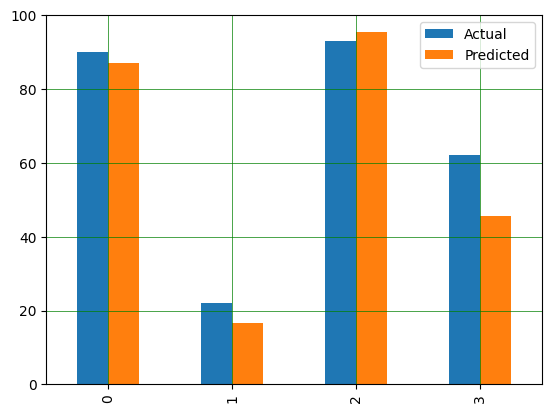

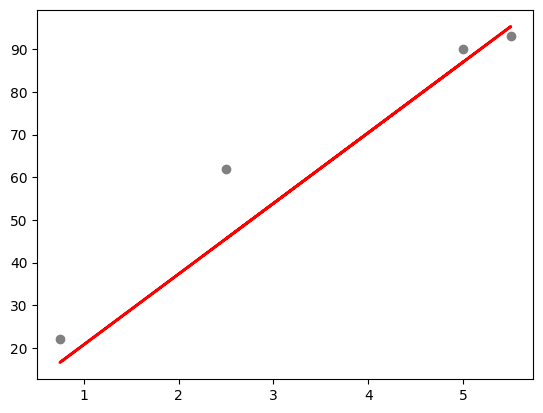

In [53]:
y_pred = regressor.predict(x_test)
# сравним фактические значения с прогнозируемыми
df = pd. DataFrame({'Actual': y_test, 'Predicted': y_pred})
df
# визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which= 'major', linestyle='-', linewidth = '0.5', color= 'green')
plt.grid (which= 'minor', linestyle=':', linewidth = '0.5', color= 'black')
plt. show()
#построим линию регрессии с тестовыми данными
plt. scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

## Задание

1.3.1 Задание

Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

Решение:

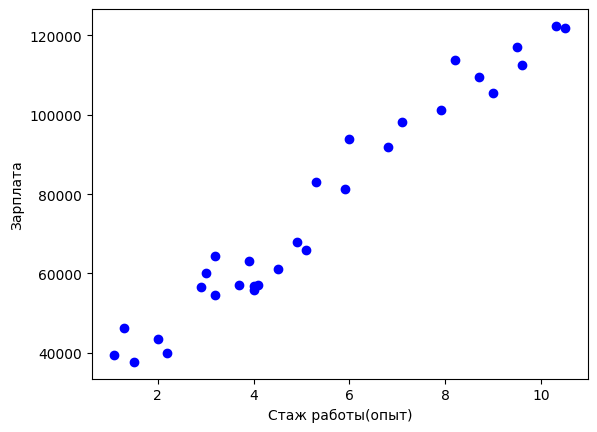

26780.09915062818
[9312.57512673]


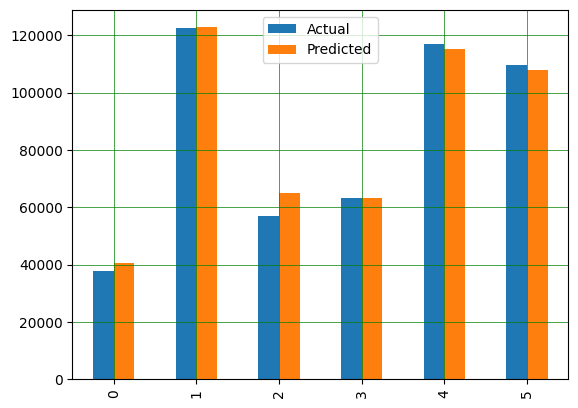

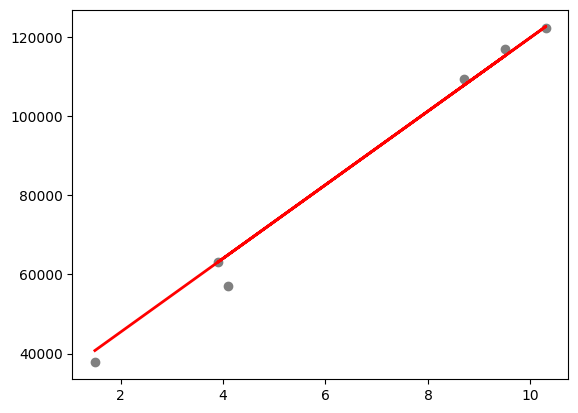

In [18]:
#Используем pandas
#matplotlib для визуализации и sklearn для обучения набора данных и импорта моделей
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Создадим набор данных для описания взаимосвязи между временем обучения студентов и успеваемостью
dataset = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
dataset.head()
#Исследуем набор данных
dataset.shape
dataset.describe()
#Нарисуем точечную диаграму
plt.scatter (dataset['YearsExperience'], dataset['Salary'], color = 'b')
plt.xlabel("Стаж работы(опыт)")
plt.ylabel("Зарплата")
plt.show()

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
# Теперь, когда у нас есть атрибуты и метки, необходимо разделить их на а обучающий и тестовый наборы.
# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
# далее можно обучить алгоритм линейной резрессии h
# необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit()
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#приведем получившиеся коэффициенты для линии регрессии
print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)
# сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df
# визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()
#построим линию регрессии с тестовыми данными
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()


# Множественная регрессия


1.3. Теоретический материал – Множественная регрессия

В предыдущем примере мы проиллюстрировали линейную регрессию
с двумя переменными. Однако, почти все реальные задачи имеют больше
параметров. Линейная регрессия с участием нескольких переменных
называется «множественной линейной регрессией» или многомерной
линейной регрессией. Шаги для выполнения множественной линейной
регрессии аналогичны шагам для простой . Разница заключается в оценке.
Вы можете использовать множественную регрессию, чтобы узнать, какой
фактор оказывает наибольшее влияние на прогнозируемый результат или
как различные переменные связаны друг с другом.



## Пример

1.3.1 Пример

В примере показано создание 2d-массива со значениями x и y. Список
target содержит возможные выходные классы (часто называемые
метками). Далее происходит обучене классификатора k-ближайших
соседей по исходным данным. Далее производится прогноз
принадлежности к классам для двух точек данных.

Решение:

In [54]:
import numpy as np
y=[1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X=[[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
  [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
  [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
X=np.transpose(X)
X=np.c_[X,np.ones(X.shape[0])]
linreg=np.linalg.lstsq(X,y,rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


Кроме этого можно использовать возможности библиотеки sсikit-learn.
Рассмотрим пример.

1.3.2 Пример

Для данных из предыдущей задачи построить модель множественной
линейной регрессии с использованием средств библиотеки sсikit-learn.

Решение:


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y=[1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X=[[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
  [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
  [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

#Формируем DataFrame из двух списков
new_y=np.array(y)
new_y=new_y.transpose()
df1=pd.DataFrame(new_y)
new_X=np.array(X)
new_X=new_X.transpose()
df2=pd.DataFrame(new_X)
df1=df1.rename(columns={0:'y'},inplace=False)
df2=df2.rename(columns={0:'x1',1:'x2',2:'x3'},inplace=False)

frames=[df1,df2]
dataset=pd.concat([df1,df2],axis=1,join="inner")
print(dataset.head())

#Изучим данные
print(dataset.shape)
print(dataset.describe())
#Разделим данные на метки и атрибуты
X=dataset[['x1','x2','x3']]
y=dataset['y']
#Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
#Для обучения алгоритма мы используем метод fit() класса LinearRegression
regressor = LinearRegression()
print(regressor.fit(X_train, y_train))
print('\n')
#Выводим коэф. модели
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coeff_df,'\n')
#Чтобы сделать прогнозы на тестовых данных, выполним следующий ход
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df,'\n')
#Оцениваем производительность алгоритма. MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

   y  x1  x2  x3
0  1   0   4   4
1  2   2   1   1
2  3   4   2   2
3  4   1   3   5
4  3   5   4   6
(23, 4)
               y         x1         x2         x3
count  23.000000  23.000000  23.000000  23.000000
mean    3.565217   5.347826   5.521739   5.043478
std     1.674029   2.404706   2.428422   2.704849
min     0.000000   0.000000   1.000000   1.000000
25%     3.000000   4.500000   4.000000   3.000000
50%     4.000000   5.000000   6.000000   5.000000
75%     5.000000   6.500000   7.500000   7.000000
max     6.000000   9.000000   9.000000   9.000000
LinearRegression()


    Coefficient
x1     0.223219
x2     0.136709
x3    -0.063757 

    Actual  Predicted
11       5   4.119478
10       4   3.153648
21       3   3.199155
14       4   4.078333
20       1   3.258079 

Mean Squared Error: 1.3272699242343076


## Задание

1.3.1 Задание

Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.

1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv

Решение:

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

dataset = pd.read_csv('https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv')
dataset.head()
#Изучим данные
print(dataset.shape,'\n')
dataset.describe()
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
#Формируем DataFrame из двух списков
df1 = pd.DataFrame(y)
df2 = pd.DataFrame(X)
df1 = df1.rename(columns = {0: 'PtrlConsump'}, inplace = False)
df2 = df2.rename(columns = {0: 'PtrlTax', 1: 'AvgInc', 2: 'PvdHighways', 3: 'PptnDrvrlicence(%)'}, inplace = False)
print("Petrol tax, Average income, Paved Highways, Population Driver licence(%), Petrol Consumption",'\n')

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")
print(dataset,'\n')

#Разделим данные на метки и атрибуты
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
#Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
#Для обучения алгоритма мы используем метод fit() класса LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#Выводим коэф. модели
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coeff_df,'\n')
#Чтобы сделать прогнозы на тестовых данных, выполним следующий ход
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df,'\n')
#Оцениваем производительность алгоритма. MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

(48, 5) 

Petrol tax, Average income, Paved Highways, Population Driver licence(%), Petrol Consumption 

    PtrlConsump  PtrlTax  AvgInc  PvdHighways  PptnDrvrlicence(%)
0           541     9.00  3571.0       1976.0               0.525
1           524     9.00  4092.0       1250.0               0.572
2           561     9.00  3865.0       1586.0               0.580
3           414     7.50  4870.0       2351.0               0.529
4           410     8.00  4399.0        431.0               0.544
5           457    10.00  5342.0       1333.0               0.571
6           344     8.00  5319.0      11868.0               0.451
7           467     8.00  5126.0       2138.0               0.553
8           464     8.00  4447.0       8577.0               0.529
9           498     7.00  4512.0       8507.0               0.552
10          580     8.00  4391.0       5939.0               0.530
11          471     7.50  5126.0      14186.0               0.525
12          525     7.00  4817.0     

1.3.2 Задание

Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов

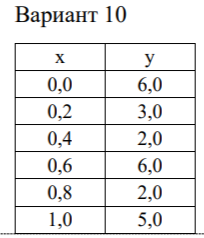

Решение:

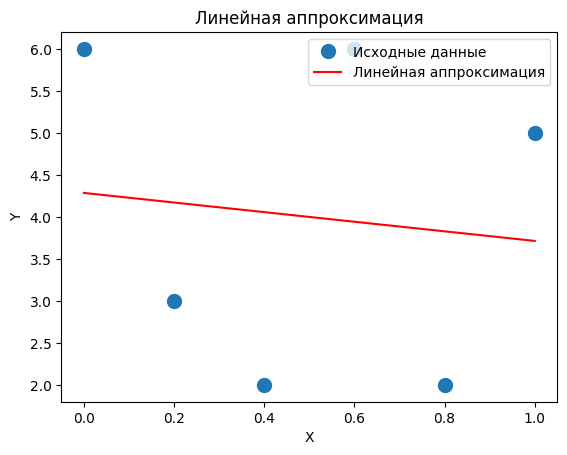

Параметры для линейной аппроксимации:
Наклон (m): -0.5714285714285721
Смещение (c): 4.285714285714284


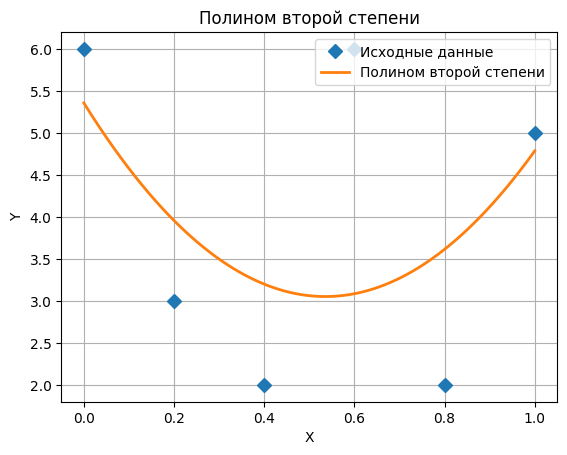

Параметры для полинома второй степени:
Коэффициент для x^2 (a): 8.035714285714285
Коэффициент для x (b): -8.607142857142858
Свободный коэффициент (c): 5.357142857142858


In [64]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
y = np.array([6.0, 3.0, 2.0, 6.0, 2.0, 5.0])

# Полином первой степени (линейная аппроксимация)
#Перепишем лин. уравнение как y=Ap, где A=[[x1]] и p=[[m],[c]]
#Построим А по х
A = np.vstack([x, np.ones(len(x))]).T
#Используем метод lstsq для решения его относительно вектора p
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

#Построим график полученной прямой и укажем точки
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная аппроксимация')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Линейная аппроксимация')
plt.show()

print("Параметры для линейной аппроксимации:")
print("Наклон (m):", m)
print("Смещение (c):", c)

# Полином второй степени
#Построим А по х
A = np.vstack([x**2, x, np.ones(len(x))]).T
#Используем метод lstsq для решения его относительно вектора p
a, b, c = np.linalg.lstsq(A, y, rcond=None)[0]

#На отрезке [0, 1]
x_prec = np.linspace(0.0, 1.0, 100)
# Рисуем точки
plt.plot(x, y, 'D', label="Исходные данные", markersize=7)
#Рисуем кривую вида параболы, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, a*x_prec**2 + b*x_prec + c, '-', lw=2, label="Полином второй степени")
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Полином второй степени')
plt.grid()
plt.show()

print("Параметры для полинома второй степени:")
print("Коэффициент для x^2 (a):", a)
print("Коэффициент для x (b):", b)
print("Свободный коэффициент (c):", c)
